In [13]:
# Importa las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('D:\\ejercios\\ejercio1\\unidad4\\cleanedData.csv')
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [15]:
data.shape

(316800, 27)

In [4]:
data.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Miramos que número de pacientes presentaron ninguna severidad -> 79200
data['Severity_None'].value_counts()

Severity_None
0    237600
1     79200
Name: count, dtype: int64

In [10]:
# Miramos que número de pacientes presentaron severidad suave
data['Severity_Mild'].value_counts()

Severity_Mild
0    237600
1     79200
Name: count, dtype: int64

In [11]:
# El número de pacientes que presentaron severidad moderada-> 79200
data['Severity_Moderate'].value_counts()

Severity_Moderate
0    237600
1     79200
Name: count, dtype: int64

In [12]:
# El número de pacientes que presentaron severidad moderada-> 79200
data['Severity_Severe'].value_counts()

Severity_Severe
0    237600
1     79200
Name: count, dtype: int64

In [13]:
# Primero vamos a realizar un análisis de los datos (Exploratory Data Analysis o EDA).
# Para comenzar controlamos el total de los valores nulos de las celdas.
data.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0_9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [18]:
#Como no tenemos ningún valor nulo, no realizamos ningún cambio inicial de los datos

In [19]:
#Comprobamos que tenemos todas las características como enteros 0 o 1 dependiendo 
#si el paciente presenta esa sintomatología o no. La única característica que no 
#corresponde con un valor entero es Country.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0_9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [6]:
#Comprobamos todos los valores que toma la característica Country
print("Número de valores que toma la característica Country ->")
data['Country'].unique()

Número de valores que toma la característica Country ->


array(['China', 'Italy', 'Iran', 'Republic of Korean', 'France', 'Spain',
       'Germany', 'UAE', 'Other-EUR', 'Other'], dtype=object)

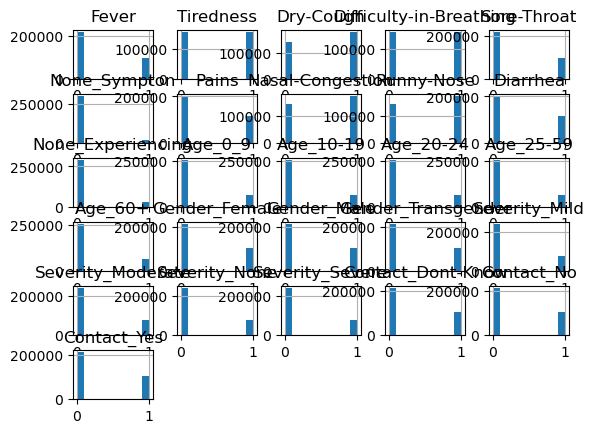

In [16]:
data.hist()
plt.show()

(array([31680., 31680., 31680., 31680., 31680., 31680., 31680., 31680.,
        31680., 31680.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

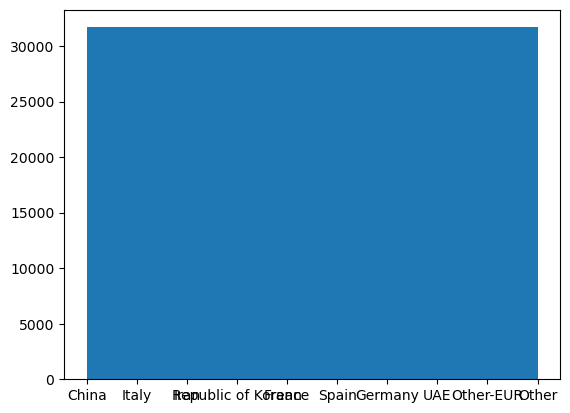

In [7]:
plt.hist(data.Country)

In [27]:
tree = DecisionTreeClassifier(max_depth=3)  # Puedes ajustar el valor de max_depth según sea necesario
arbol = tree.fit(X_train, y_train)

In [28]:
tree_rules = export_text(arbol, feature_names=predictors_col)
print(tree_rules)

|--- Sore-Throat <= 0.50
|   |--- Severity_None <= 0.50
|   |   |--- Runny-Nose <= 0.50
|   |   |   |--- class: Italy
|   |   |--- Runny-Nose >  0.50
|   |   |   |--- class: China
|   |--- Severity_None >  0.50
|   |   |--- Fever <= 0.50
|   |   |   |--- class: Iran
|   |   |--- Fever >  0.50
|   |   |   |--- class: Spain
|--- Sore-Throat >  0.50
|   |--- Age_60+ <= 0.50
|   |   |--- Severity_Mild <= 0.50
|   |   |   |--- class: UAE
|   |   |--- Severity_Mild >  0.50
|   |   |   |--- class: Other-EUR
|   |--- Age_60+ >  0.50
|   |   |--- Severity_Mild <= 0.50
|   |   |   |--- class: UAE
|   |   |--- Severity_Mild >  0.50
|   |   |   |--- class: Other



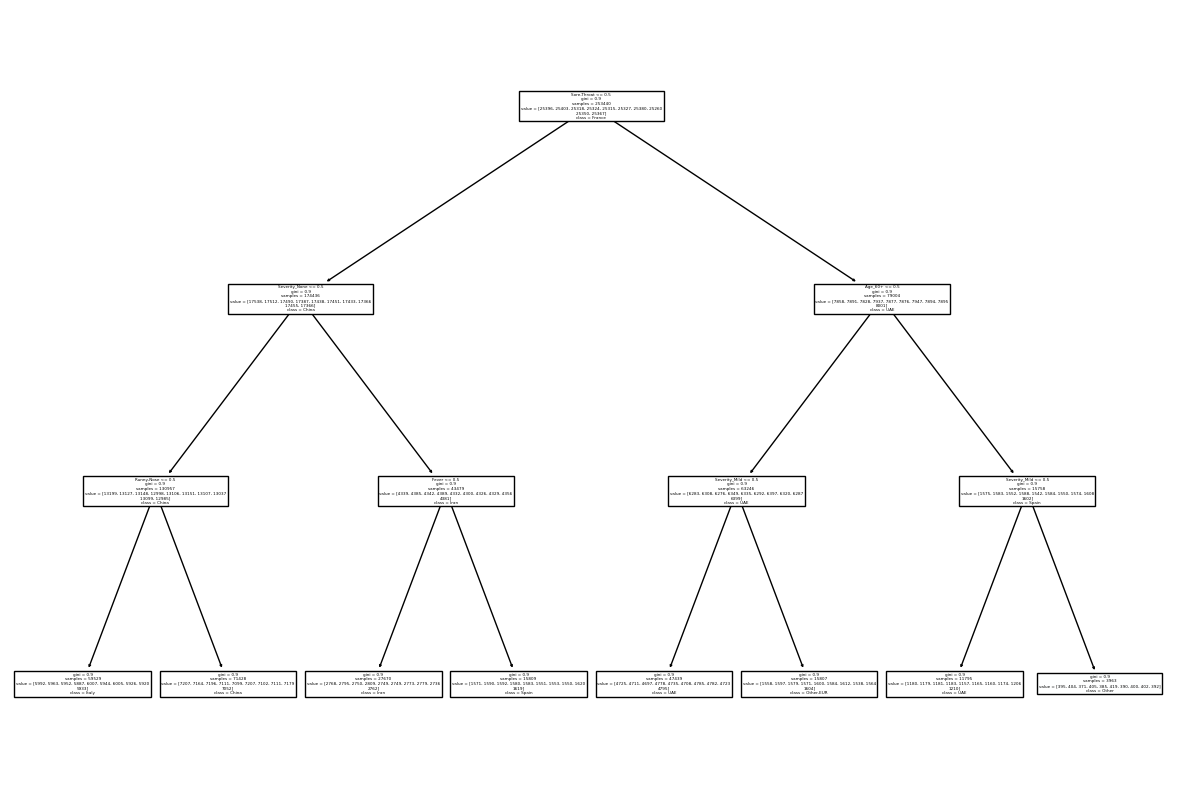

In [29]:
plt.figure(figsize=(15, 10))
plot_tree(arbol, filled=True, feature_names=predictors_col, class_names=arbol.classes_.tolist())
plt.show()

In [30]:
predicciones = arbol.predict(X_test)

In [31]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,China,Iran,Italy,Other,Other-EUR,Spain,UAE
Actual,,,,,,,
China,1703,697,1433,100,422,409,1520
France,1746,670,1462,91,383,390,1535
Germany,1714,715,1473,124,401,388,1547
Iran,1799,656,1538,90,409,400,1464
Italy,1811,716,1418,110,380,397,1533
Other,1703,716,1481,76,396,429,1552
Other-EUR,1808,692,1420,105,368,427,1480
Republic of Korean,1799,686,1499,95,442,430,1469
Spain,1731,729,1505,93,416,360,1496


In [32]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.09471275252525252